In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data

In [2]:
# Read in 1st dataset 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#Second dataset of image predictions.

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
#Tweepy API for the third dataset

auth = tweepy.OAuthHandler('Hidden', 'Hidden')
auth.set_access_token('Hidden', 'Hidden')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True,)

In [7]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 728
Rate limit reached. Sleeping for: 728


In [8]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets not found 25


In [9]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [10]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [11]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36399,7743,8759847,15,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31351,5736,8759847,15,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23626,3797,8759847,15,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39702,7909,8759847,15,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37916,8534,8759847,15,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


## Assessing Data

### Visual Assessment

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:

image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:

tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36399,7743,8759847,15,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31351,5736,8759847,15,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23626,3797,8759847,15,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39702,7909,8759847,15,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37916,8534,8759847,15,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19083,2856,8759847,15,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11115,1862,8759847,15,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,61361,17282,8759847,15,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,26284,3936,8759847,15,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,30018,6738,8759847,15,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic Assessment

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* tweet_id is int64, should be converted to string.
* timestamp is object, shoud be converted to datetime.

* We can see that 181 tweets are retweets and 78 tweets are replies.
* The columns doggo, floofer, pupper, puppo relate to the same random variable.

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

* Denominator should be 10.

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

* Numerator values should be greater than 10. Some unexpected values.

In [19]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
an            7
Toby          7
Buddy         7
Daisy         7
Bella         6
Dave          6
Leo           6
Stanley       6
Milo          6
Oscar         6
Koda          6
Jack          6
Jax           6
Scout         6
Rusty         6
Phil          5
           ... 
Jeb           1
Todo          1
Anthony       1
Griswold      1
Harry         1
Ralphie       1
Banditt       1
Angel         1
Bertson       1
Bayley        1
Combo         1
Skittles      1
Arlo          1
Godzilla      1
Storkson      1
Marlee        1
Lacy          1
BeBe          1
Pip           1
Thor          1
Geoff         1
Lilah         1
Dixie         1
Lenox         1
Al            1
Willy         1
Mauve         1
my            1
Odin          1
Lambeau       1
Name: name, Length: 957,

* a, an etc are not valid dog names.

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* We can see that there are three different predictions and corresponding confidence values, but we require only one prediction.

In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [22]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

### Tidiness issues
* In twitter_archive, the columns "pupper", "puppo", "doggo", "floofer" etc are essentially the same categorical variable, and so only one of them is required.
* In image_prediction, there are three predictions p1,p2,p3, while we require only one.
* All three dataframes should be combined to one.
* If all rating_demoninator is equal to 10, we no longer require this column.

### Quality issues
#### twitter_archive
* tweet_id is int64, should be converted to string.
* timestamp is object, shoud be converted to datetime.
* We can see that 181 tweets are retweets.
* 78 tweets are replies.
* rating_denominator is sometimes not equal to 10.
* rating_numerator has values less than 10 and also some unexpected values.
* "a", "an" etc. are not valid dog names.
* Source column is not in right format.
#### image_prediction
* Only 2075 rows, possible missing values.
* Inconsistent datatypes for some columns.
#### json_data
* 163 tweets retweeted

## Cleaning Data

#### Define
* Remove retweets and replies.

In [23]:
#Code
twitter_archive_copy = twitter_archive.copy()
twitter_archive_copy = twitter_archive[twitter_archive_copy.in_reply_to_status_id.isnull() & twitter_archive_copy.retweeted_status_id.isnull()]

In [24]:
#Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [25]:
# We can now remove the retweet and reply columns.
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
* Remove rows where rating_denominator is not 10.

In [27]:
# Code
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.rating_denominator == 10]

In [28]:
#Test
twitter_archive_copy.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Define
* Remove rows where rating_numerator is greater than 15 and less than 10.

In [29]:
#Code
twitter_archive_copy = twitter_archive_copy[(twitter_archive_copy.rating_numerator < 16) & (twitter_archive_copy.rating_numerator > 10)]

In [30]:
#Test
twitter_archive_copy.rating_numerator.value_counts()

12    486
11    413
13    287
14     38
Name: rating_numerator, dtype: int64

#### Define
* Remove doggo, floofer, puppo pupper columns.

In [31]:
# code
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1)

In [32]:
#test
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


#### Define
* Convert timestamp to datetime format.

In [33]:
#Code
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy.timestamp)
twitter_archive_copy['timestamp'] = twitter_archive_copy.timestamp.dt.floor('s')

In [34]:
#Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2339
Data columns (total 8 columns):
tweet_id              1224 non-null int64
timestamp             1224 non-null datetime64[ns]
source                1224 non-null object
text                  1224 non-null object
expanded_urls         1223 non-null object
rating_numerator      1224 non-null int64
rating_denominator    1224 non-null int64
name                  1224 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 86.1+ KB


#### Define
* Simplify the source column.


In [35]:
#code
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.extract('^<a.+>(.+)</a>$')

In [36]:
#test
twitter_archive_copy['source'].value_counts()

Twitter for iPhone     1130
Vine - Make a Scene      71
Twitter Web Client       16
TweetDeck                 7
Name: source, dtype: int64

#### Define
* There is one row with a missing value in "expended_urls". Drop this row

In [37]:
#Code
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.expanded_urls.notnull()]

In [38]:
#Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 2339
Data columns (total 8 columns):
tweet_id              1223 non-null int64
timestamp             1223 non-null datetime64[ns]
source                1223 non-null object
text                  1223 non-null object
expanded_urls         1223 non-null object
rating_numerator      1223 non-null int64
rating_denominator    1223 non-null int64
name                  1223 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 86.0+ KB


#### Copies of other two dataframes.


In [39]:
image_prediction_copy = image_prediction.copy()

In [40]:
tweet_json_copy = tweet_json.copy()

#### Define
* Remove retweets from tweet_json.

In [41]:
#code
tweet_json_copy = tweet_json_copy[tweet_json_copy.retweeted_status == 'Original tweet']

In [42]:
#test
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2168 non-null object
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
followers_count     2168 non-null int64
friends_count       2168 non-null int64
source              2168 non-null object
retweeted_status    2168 non-null object
url                 2168 non-null object
dtypes: int64(4), object(4)
memory usage: 152.4+ KB


In [43]:
#Drop retweeted_status column.
tweet_json_copy.drop(['retweeted_status'], axis = 1, inplace = True)

#### Define
* Combine the dataframes.

In [44]:
#convert tweet_id to object.
image_prediction_copy['tweet_id'] = image_prediction_copy['tweet_id'].astype(str)
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [45]:
#code
from functools import reduce
clean_data = reduce(lambda x,y: pd.merge(x,y, on='tweet_id', how='inner'), [twitter_archive_copy, image_prediction_copy, tweet_json_copy])

In [46]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 0 to 1117
Data columns (total 25 columns):
tweet_id              1118 non-null object
timestamp             1118 non-null datetime64[ns]
source_x              1118 non-null object
text                  1118 non-null object
expanded_urls         1118 non-null object
rating_numerator      1118 non-null int64
rating_denominator    1118 non-null int64
name                  1118 non-null object
jpg_url               1118 non-null object
img_num               1118 non-null int64
p1                    1118 non-null object
p1_conf               1118 non-null float64
p1_dog                1118 non-null bool
p2                    1118 non-null object
p2_conf               1118 non-null float64
p2_dog                1118 non-null bool
p3                    1118 non-null object
p3_conf               1118 non-null float64
p3_dog                1118 non-null bool
favorite_count        1118 non-null int64
retweet_count         1118 non-n

In [47]:
clean_data.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,banana,0.076110,False,36399,7743,8759847,15,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,papillon,0.068957,True,31351,5736,8759847,15,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,kelpie,0.031379,True,23626,3797,8759847,15,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,True,spatula,0.040836,False,39702,7909,8759847,15,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,German_short-haired_pointer,0.175219,True,37916,8534,8759847,15,Twitter for iPhone,https://t.co/0g0KMIVXZ3


In [48]:
#Remove one source column.
clean_data.drop(['source_y'], axis = 1, inplace = True)

#### Reduce the three predictions to one, the most likely.

In [49]:

# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
clean_data.apply(breed_confidence, axis=1)

# add lists created to master dataframe
clean_data['breed'] = breed
clean_data['confidence'] = confidence

# check the columns have been added
clean_data.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,banana,0.076110,False,36399,7743,8759847,15,https://t.co/MgUWQ76dJU,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,papillon,0.068957,True,31351,5736,8759847,15,https://t.co/aQFSeaCu9L,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,kelpie,0.031379,True,23626,3797,8759847,15,https://t.co/r0YlrsGCgy,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,spatula,0.040836,False,39702,7909,8759847,15,https://t.co/tD36da7qLQ,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,German_short-haired_pointer,0.175219,True,37916,8534,8759847,15,https://t.co/0g0KMIVXZ3,basset,0.555712


In [50]:
#Remove prediction columns
clean_data.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'], axis = 1, inplace = True)

In [51]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 0 to 1117
Data columns (total 17 columns):
tweet_id              1118 non-null object
timestamp             1118 non-null datetime64[ns]
source_x              1118 non-null object
text                  1118 non-null object
expanded_urls         1118 non-null object
rating_numerator      1118 non-null int64
rating_denominator    1118 non-null int64
name                  1118 non-null object
jpg_url               1118 non-null object
img_num               1118 non-null int64
favorite_count        1118 non-null int64
retweet_count         1118 non-null int64
followers_count       1118 non-null int64
friends_count         1118 non-null int64
url                   1118 non-null object
breed                 1118 non-null object
confidence            1118 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7), object(8)
memory usage: 157.2+ KB


## Store cleaned data

In [52]:
clean_data.to_csv('twitter_archive_master.csv', index = False)

## Analyze data

In [53]:
final_data = pd.read_csv('twitter_archive_master.csv')

### Top breeds by tweet count.

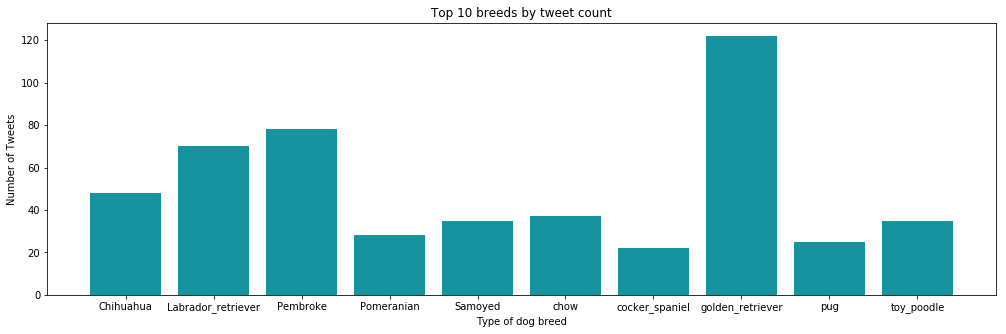

In [54]:
top_breeds = final_data[final_data.breed != 'Unknown'].breed.value_counts().head(10)
plt.figure(figsize = (17,5))
plt.bar(top_breeds.index, top_breeds, color = '#17929F')
plt.xlabel('Type of dog breed')
plt.ylabel('Number of Tweets')
plt.title('Top 10 breeds by tweet count')
plt.show()

* Golden Retriever is the most popular breed.

### Top breeds by favorite count

In [61]:
final_data = final_data[final_data.breed != 'Unknown']

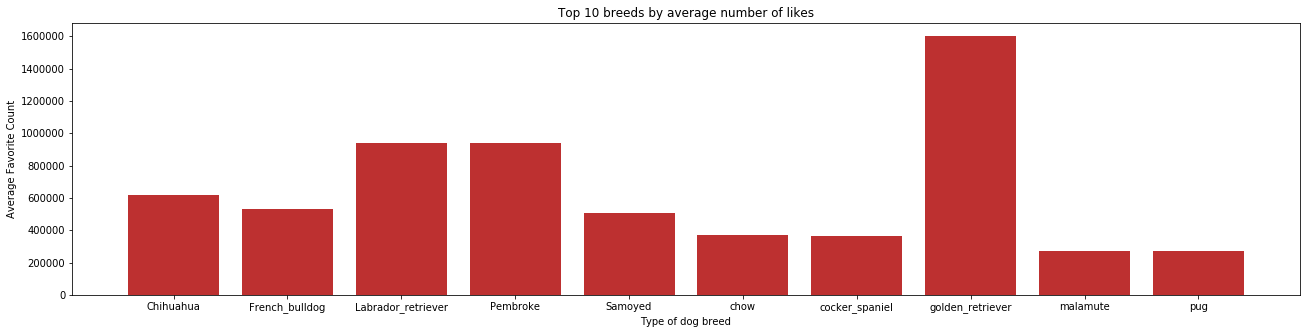

In [62]:
favorite_df = final_data.groupby('breed')['favorite_count'].sum()
favorite_df = favorite_df.sort_values(ascending = False).head(10)

plt.figure(figsize = (22,5))
plt.bar(favorite_df.index, favorite_df, color = "#BD3030")
plt.xlabel('Type of dog breed')
plt.ylabel('Average Favorite Count')
plt.title('Top 10 breeds by average number of likes')
plt.show()

### Top breeds by retweet count

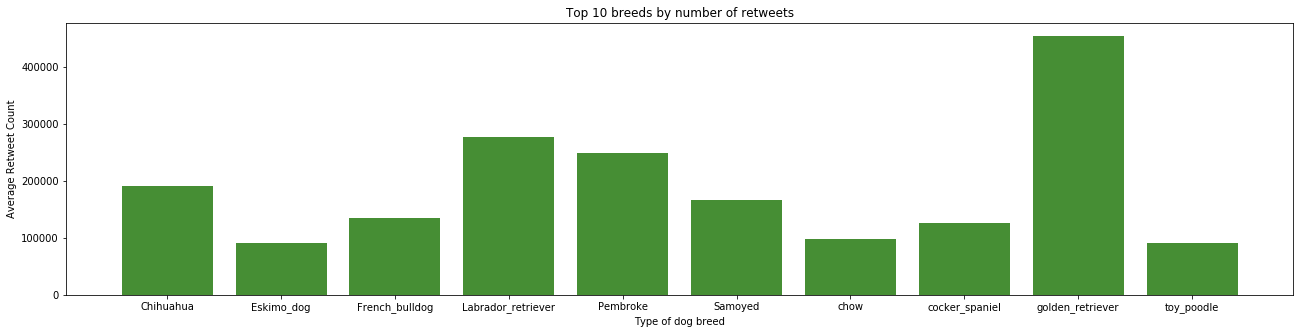

In [66]:
retweet_df = final_data.groupby('breed')['retweet_count'].sum()
retweet_df = retweet_df.sort_values(ascending = False).head(10)
plt.figure(figsize = (22,5))
plt.bar(retweet_df.index, retweet_df, color = "#468E34")
plt.xlabel('Type of dog breed')
plt.ylabel('Average Retweet Count')
plt.title('Top 10 breeds by number of retweets')
plt.show()

### Relationship between retweets and likes

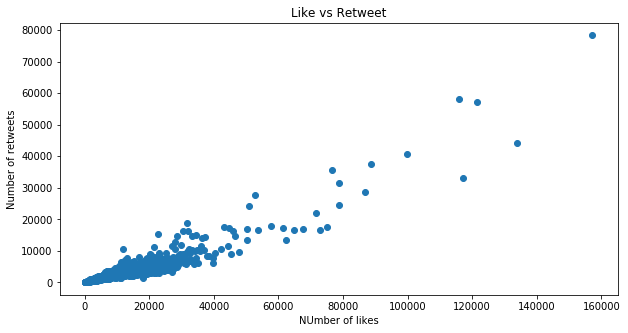

In [64]:
plt.figure(figsize = (10,5))
plt.scatter(final_data.favorite_count, final_data.retweet_count)
plt.xlabel('NUmber of likes')
plt.ylabel('Number of retweets')
plt.title('Like vs Retweet')
plt.show()

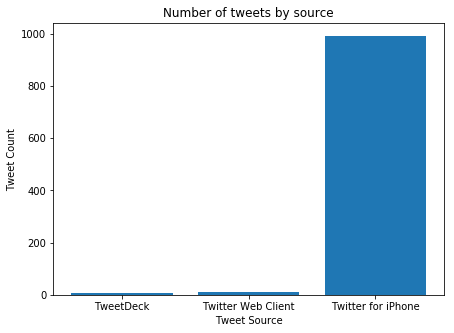

In [65]:
source_count = final_data.source_x.value_counts()
plt.figure(figsize = (7,5))
plt.bar(source_count.index, source_count)
plt.xlabel('Tweet Source')
plt.ylabel('Tweet Count')
plt.title('Number of tweets by source')
plt.show()

* Most common platform used is 'Twitter for iPhone".